# 牛顿法

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.misc import derivative

In [2]:
def f(x):
    return x**3+x-1
def df(x):
    return 3*x**2+1

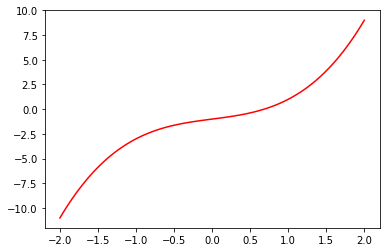

In [3]:
x=np.linspace(-2, 2, 100)
plt.plot(x,f(x),'r-')
plt.show()

In [4]:
x0=2.0
error = 1
i=0
print('{:10s}{:16s}{:16s}{:16s}{:16s}{:16s}{:16s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error>1.0*10**(-8):
    i=i+1
    x1=x0-f(x0)/df(x0)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.8e}{:16.8e}{:16.8e}{:16.8e}{:16.8e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print(x0)

          x               f(x)            e               |e(i)/e(i-1)|   |e(i)/e2(i-1)|  step            
  2.00000000e+00  1.30769231e+00  6.92307692e-01  6.92307692e-01  6.92307692e-01               1
  1.30769231e+00  8.92708643e-01  4.14983665e-01  5.99420849e-01  8.65830116e-01               2
  8.92708643e-01  7.14539401e-01  1.78169242e-01  4.29340373e-01  1.03459584e+00               3
  7.14539401e-01  6.83193139e-01  3.13462623e-02  1.75935318e-01  9.87461791e-01               4
  6.83193139e-01  6.82328443e-01  8.64695747e-04  2.75852904e-02  8.80018489e-01               5
  6.82328443e-01  6.82327804e-01  6.39133383e-07  7.39142508e-04  8.54800675e-01               6
  6.82327804e-01  6.82327804e-01  3.48943097e-13  5.45962871e-07  8.54223682e-01               7
0.6823278038280193


# 尝试不同形式的不动点迭代

In [8]:
def f1(x): #x=1-x^3,  g'(0.68)=1.396
    return 1-x**3
def f2(x): # x=(1-x)^(1/3), g'(0.68)= 0.7159
    return (1-x)**(1/3)
def f3(x): #x=1/(1+x^2), g'(0.68)=0.6353
    return 1/(1+x**2)
error=1
x0=0.5
i=0
print('{:10s}{:16s}{:16s}{:16s}{:16s}{:16s}{:16s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error > 1e-8:
    i=i+1
    x1=f2(x0)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print("The fix point is ", x0)

          x               f(x)            e               |e(i)/e(i-1)|   |e(i)/e2(i-1)|  step            
      5.0000e-01      7.9370e-01      2.9370e-01      2.9370e-01      2.9370e-01               1
      7.9370e-01      5.9088e-01      2.0282e-01      6.9057e-01      2.3513e+00               2
      5.9088e-01      7.4236e-01      1.5148e-01      7.4689e-01      3.6825e+00               3
      7.4236e-01      6.3631e-01      1.0605e-01      7.0010e-01      4.6216e+00               4
      6.3631e-01      7.1380e-01      7.7491e-02      7.3067e-01      6.8897e+00               5
      7.1380e-01      6.5901e-01      5.4795e-02      7.0711e-01      9.1252e+00               6
      6.5901e-01      6.9863e-01      3.9626e-02      7.2318e-01      1.3198e+01               7
      6.9863e-01      6.7045e-01      2.8184e-02      7.1124e-01      1.7949e+01               8
      6.7045e-01      6.9073e-01      2.0281e-02      7.1958e-01      2.5531e+01               9
      6.9073e-01    

# 自动求导

In [28]:
x0=-10000.0
error = 1
while error>1.0*10**(-6):
    x1=x0-f(x0)/derivative(f, x0)
    error=abs(x1-x0)
    x0=x1
print(x0)

0.6823276224163309


# 复数根

In [28]:
x0=complex(0,1)
#x0=complex(0,+1)
#x0=complex(2,+1)
error = 1
i=0
while error>1.0*10**(-6):
    print('At step: ',i,x0)
    x1=x0-f(x0)/derivative(f, x0, dx=1e-6)
    error=abs(x1-x0)
    x0=x1
print(x0)

At step:  0 1j
At step:  0 (-0.49999999999949996+1j)
At step:  0 (-0.30177514793496824+1.1242603550359989j)
At step:  0 (-0.34417793010765785+1.162657019978378j)
At step:  0 (-0.3411733835258236+1.1615371426329284j)
At step:  0 (-0.341163901870783+1.161541399897093j)
(-0.34116390191400975+1.161541399997252j)


# 不动点迭代

In [33]:
x0=complex(-0.3411639,1.161541)
print(f3(x0))
print(derivative(f3, x0))

(-0.3411629778198211+1.1615424773670562j)
(-0.043314635495249346-0.4576073594645456j)


In [27]:
x0=complex(-0.341,-1.161)
derivative(f3, x0)

(-0.04307696921446523+0.4576661514591345j)

In [34]:
error=1
#x0=0.5
x0=complex(-0.3411639,1.161541)
i=0
while error > 1e-6:
    i=i+1
    if i>100:
        print("100 steps!")
        break
    print('At step: ',i,x0)
    x1=f3(x0)
    error=abs(x1-x0)
    x0=x1
print("The fix point is ", x0)

At step:  1 (-0.3411639+1.161541j)
At step:  2 (-0.3411629778198211+1.1615424773670562j)
At step:  3 (-0.3411688834585431+1.161540656866844j)
At step:  4 (-0.3411488136618268+1.1615318207641265j)
At step:  5 (-0.34118212077650323+1.1616021488279726j)
At step:  6 (-0.34125612206235295+1.1613361402391165j)
At step:  7 (-0.34043948319810463+1.1618773193856589j)
At step:  8 (-0.3438922372728572+1.1623197497960864j)
At step:  9 (-0.3357056717282959+1.1531691342599746j)
At step:  10 (-0.33575893729764555+1.1974239308346295j)
At step:  11 (-0.42831300613210443+1.0726054135593093j)
At step:  12 (0.039002562203713044+1.0869509295139153j)
At step:  13 (-4.547669157253832-2.1428486957159323j)
At step:  14 (0.025434264404689138-0.029006834486915007j)
At step:  15 (1.0001923540070314+0.0014761059155257842j)
At step:  16 (0.4999032875237992-0.0007379109900142584j)
At step:  17 (0.8000619645815681+0.0004722449983231107j)
At step:  18 (0.6097191901024553-0.0002809188016880141j)
At step:  19 (0.7289918

# 开根号计算

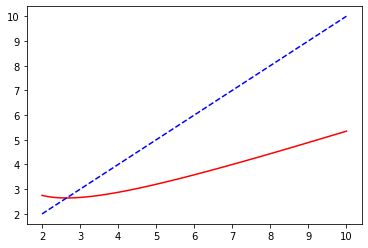

In [29]:
def g(x): #x-f(x)/df(x)
    return x-(x**2-7)/(2.0*x)
x=np.linspace(2, 10, 100)
plt.plot(x,g(x),'r',x,x,'b--')
plt.show()

In [31]:
x0=7.0
error = 1
while error>1.0*10**(-8):
#    x1=x0-f(x0)/derivative(f, x0, dx=1e-6)
    x1=g(x0)
    print(x0)
    error=abs(x1-x0)
    x0=x1
print(x0)

7.0
4.0
2.875
2.654891304347826
2.6457670441902894
2.6457513111113693
2.6457513110645907


# 牛顿法的线性收敛

In [42]:
def f(x):
    return (x-1)**3

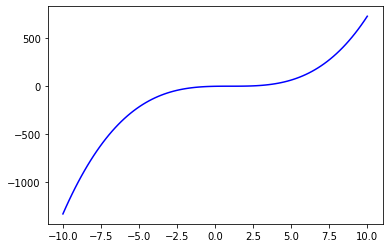

In [43]:
x=np.linspace(-10, 10, 100)
plt.plot(x,f(x),'b-')

In [44]:
x0=10.0
error = 1
i=0
print('{:10s}{:16s}{:16s}{:16s}{:16s}{:16s}{:16s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error>1.0*10**(-6):
    i=i+1
    x1=x0-f(x0)/derivative(f, x0, dx=1e-6)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print(x0)

          x               f(x)            e               |e(i)/e(i-1)|   |e(i)/e2(i-1)|  step            
      1.0000e+01      7.0000e+00      3.0000e+00      3.0000e+00      3.0000e+00               1
      7.0000e+00      5.0000e+00      2.0000e+00      6.6667e-01      2.2222e-01               2
      5.0000e+00      3.6667e+00      1.3333e+00      6.6667e-01      3.3333e-01               3
      3.6667e+00      2.7778e+00      8.8889e-01      6.6667e-01      5.0000e-01               4
      2.7778e+00      2.1852e+00      5.9259e-01      6.6667e-01      7.5000e-01               5
      2.1852e+00      1.7901e+00      3.9506e-01      6.6667e-01      1.1250e+00               6
      1.7901e+00      1.5267e+00      2.6337e-01      6.6667e-01      1.6875e+00               7
      1.5267e+00      1.3512e+00      1.7558e-01      6.6667e-01      2.5312e+00               8
      1.3512e+00      1.2341e+00      1.1706e-01      6.6667e-01      3.7969e+00               9
      1.2341e+00    

# 改进的牛顿法

In [54]:
x0=10.0 #100
error = 1
i=0
print('{:16s}{:21s}{:21s}{:21s}{:21s}{:21s}{:21s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error>1.0*10**(-9):
    i=i+1
    x1=x0-3.0*f(x0)/derivative(f, x0, dx=1e-6)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print(x0)

                x                    f(x)                 e                    |e(i)/e(i-1)|        |e(i)/e2(i-1)|       step                 
      1.0000e+01      1.0000e+00      9.0000e+00      9.0000e+00      9.0000e+00               1
      1.0000e+00      1.0000e+00      1.5274e-12      1.6972e-13      1.8857e-14               2
0.999999992015894


# 例2

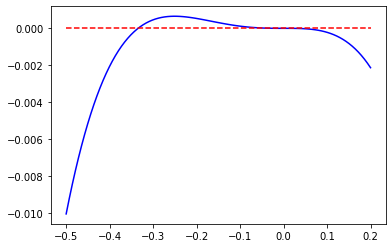

In [55]:
def f(x):
    return np.sin(x)+x**2*np.cos(x)-x**2-x
x=np.linspace(-0.5, 0.2, 100)
y0=np.zeros(x.size)
plt.plot(x,f(x),'b',x,y0,'r--')
plt.show()

In [56]:
x0=0
print('f: ',f(0))
print('f^(1): ',derivative(f, x0, dx=1e-8, n=1))
print('f^(2): ',derivative(f, x0, dx=1e-6, n=2))
print('f^(3): ',derivative(f, x0, dx=1e-6, n=3,order=5))

f:  0.0
f^(1):  0.0
f^(2):  0.0
f^(3):  -0.9999223942337013


In [57]:
x0=1  # -1
error = 1
i=0
print('{:10s}{:16s}{:16s}{:16s}{:16s}{:16s}{:16s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error>0.5*10**(-6):
    i=i+1
    x1=x0-f(x0)/derivative(f, x0, dx=1e-6)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print(x1)

          x               f(x)            e               |e(i)/e(i-1)|   |e(i)/e2(i-1)|  step            
      1.0000e+00      7.2159e-01      2.7841e-01      2.7841e-01      2.7841e-01               1
      7.2159e-01      5.2137e-01      2.0022e-01      7.1915e-01      2.5831e+00               2
      5.2137e-01      3.7531e-01      1.4606e-01      7.2951e-01      3.6436e+00               3
      3.7531e-01      2.6836e-01      1.0694e-01      7.3218e-01      5.0128e+00               4
      2.6836e-01      1.9026e-01      7.8102e-02      7.3030e-01      6.8288e+00               5
      1.9026e-01      1.3361e-01      5.6649e-02      7.2532e-01      9.2869e+00               6
      1.3361e-01      9.2925e-02      4.0687e-02      7.1823e-01      1.2679e+01               7
      9.2925e-02      6.4039e-02      2.8886e-02      7.0995e-01      1.7449e+01               8
      6.4039e-02      4.3778e-02      2.0261e-02      7.0142e-01      2.4282e+01               9
      4.3778e-02    

In [59]:
(2/3)**36

4.5784099211821586e-07

In [60]:
x0=-1.0
error = 1
i=0
print('{:10s}{:16s}{:16s}{:16s}{:16s}{:16s}{:16s}'.format(' ','x','f(x)','e','|e(i)/e(i-1)|','|e(i)/e2(i-1)|','step'))
while error>0.5*10**(-6):
    i=i+1
    x1=x0-3*f(x0)/derivative(f, x0, dx=1e-6)
    error1=abs(x1-x0)
    tmp=error1/error
    tmp2=error1/error**2
    print('{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16.4e}{:16d}'.format(x0,x1,error1,tmp,tmp2,i))
    error=error1
    x0=x1
print(x0)

          x               f(x)            e               |e(i)/e(i-1)|   |e(i)/e2(i-1)|  step            
     -1.0000e+00     -3.0562e-01      6.9438e-01      6.9438e-01      6.9438e-01               1
     -3.0562e-01     -4.2672e-01      1.2110e-01      1.7439e-01      2.5115e-01               2
     -4.2672e-01     -2.5819e-01      1.6853e-01      1.3917e+00      1.1492e+01               3
     -2.5819e-01     -2.2251e+00      1.9669e+00      1.1671e+01      6.9255e+01               4
     -2.2251e+00     -1.5746e-01      2.0677e+00      1.0512e+00      5.3444e-01               5
     -1.5746e-01      6.6933e-02      2.2439e-01      1.0852e-01      5.2485e-02               6
      6.6933e-02      3.5235e-03      6.3409e-02      2.8259e-01      1.2594e+00               7
      3.5235e-03      1.2241e-05      3.5112e-03      5.5374e-02      8.7328e-01               8
      1.2241e-05      2.7461e-08      1.2213e-05      3.4784e-03      9.9065e-01               9
      2.7461e-08    

# 反例

-4.0 -3.9999999996709334 3.9999999996709334


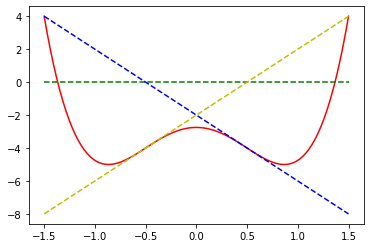

In [37]:
def f(x):
    return 4*x**4-6*x**2-11/4
x=np.linspace(-1.5, 1.5, 100)
y0=np.zeros(x.size)
print(f(0.5),derivative(f, 0.5, dx=1e-6),derivative(f, -0.5, dx=1e-6))
plt.plot(x,f(x),'r',x,y0,'g--',x,-4-4*(x-0.5),'b--',x,-4+4*(x+0.5),'y--')
plt.show()

In [17]:
derivative(f, -0.5, dx=1e-6)

3.9999999996709334

In [40]:
x0=0.6
error = 1
n=0
while error>1.0*10**(-6):
    n=n+1
    print(n)
    if(n>100):
        break
    x1=x0-f(x0)/derivative(f, x0, dx=1e-6)
    error=abs(x1-x0)
    print(x1)
    x0=x1
print(x0)

1
-0.5729700855309646
2
0.5363592738367472
3
-0.5083899203291523
4
0.5004272655266196
5
-0.5000010959636486
6
0.49999999997124445
7
-0.49999999997124434
8
0.5000000000822666
9
-0.5000000000822666
10
0.5000000000822666
11
-0.5000000000822666
12
0.5000000000822666
13
-0.5000000000822666
14
0.5000000000822666
15
-0.5000000000822666
16
0.5000000000822666
17
-0.5000000000822666
18
0.5000000000822666
19
-0.5000000000822666
20
0.5000000000822666
21
-0.5000000000822666
22
0.5000000000822666
23
-0.5000000000822666
24
0.5000000000822666
25
-0.5000000000822666
26
0.5000000000822666
27
-0.5000000000822666
28
0.5000000000822666
29
-0.5000000000822666
30
0.5000000000822666
31
-0.5000000000822666
32
0.5000000000822666
33
-0.5000000000822666
34
0.5000000000822666
35
-0.5000000000822666
36
0.5000000000822666
37
-0.5000000000822666
38
0.5000000000822666
39
-0.5000000000822666
40
0.5000000000822666
41
-0.5000000000822666
42
0.5000000000822666
43
-0.5000000000822666
44
0.5000000000822666
45
-0.50000000008